In [185]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder # 범주형 변수처리

# File system manangement
import os # 파일 시스템 관리

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
# Training data
app_train = pd.read_csv("application_train.csv")
print('Training data shape: ', app_train.shape) # 크기 확인
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
# Testing data features
app_test = pd.read_csv('application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object': # 칼럼이 object타입이면
        
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:  # .unique method는 칼럼마다 값의 종류를 보여주는 operator.
            
            # Train on the training data
            le.fit(app_train[col])   # 라벨인코딩: 두 개 이하의 값 종류를 가진 칼럼을 1과 0의 값을 가진 변수로 변환해준다. ex) 성별
            
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])  # 라벨 인코딩으로 변환해서 원래 데이터의 칼럼을 대체해준다.
            app_test[col] = le.transform(app_test[col])   # test 데이터에도 동일하게 변환.
            
            # Keep track of how many columns were label encoded
            le_count += 1   # 라벨 인코딩된 데이터의 개수를 세주기 위해 count 1 증가.
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


가변수는 해당 범주에 해당하는 경우 1, 아닌 경우 0으로 값을 입력해서 범주형 자료의 값을 인식할 수 있도록 해준다.
범주형 자료를 가변수로 변환해주는 operator는 get_dummies()가 있다.

In [189]:
# one-hot encoding of categorical variables
print(app_train.shape, app_test.shape)

app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)


print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

(307511, 122) (48744, 121)
Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


결과를 보면 dummy variable을 생성하여 변수의 종류가 train data의 경우 122에서 243으로 증가했고, test data의 경우 121에서 239로 증가했다. 이는 120개 가량의 변수들 내에서 범주형 변수가 있었고 그 변수들 내의 값의 종류가 그만큼 많다는 의미다.

In [190]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
# align : 동시에 존재하는 칼럼을 출력해여 동일한 순서로 배열
# join = 'inner' : (교집합 외)동시에 존재하지 않는 칼럼은 삭제


# Add the target back in. 
app_train['TARGET'] = train_labels   # train 데이터에 추가해주는 이유는 위의 align method 때문에 삭제됐기 때문이다. 삭제된 이유는 위에 있음.

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


Training Features shape의 column이 1이 더 높은 이유는 target 변수가 있기 때문이다.

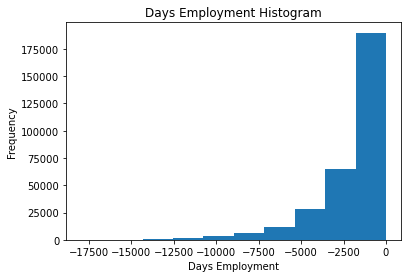

In [166]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: 0}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

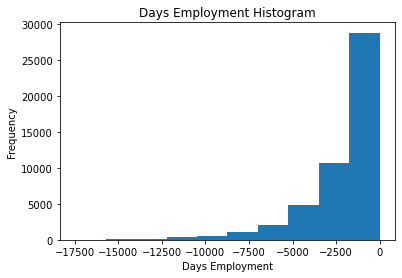

In [167]:
# Create an anomalous flag column
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_test['DAYS_EMPLOYED'].replace({365243: 0}, inplace = True)

app_test['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [168]:
isnull = app_train.isnull().sum().sort_values(ascending=True)
print(isnull)   # 결측치를 오름순으로 배열해서 isnull을 만들었다.
isnull = pd.DataFrame(isnull[isnull[:]>0])   #isnull을 0보다 큰 변수들만 추출
isnull.index   # 결측치가 있는 변수들을 확인한다.

SK_ID_CURR                                    0
OCCUPATION_TYPE_Private service staff         0
OCCUPATION_TYPE_Realty agents                 0
OCCUPATION_TYPE_Sales staff                   0
OCCUPATION_TYPE_Secretaries                   0
                                          ...  
NONLIVINGAPARTMENTS_MODE                 213514
NONLIVINGAPARTMENTS_AVG                  213514
COMMONAREA_MODE                          214865
COMMONAREA_AVG                           214865
COMMONAREA_MEDI                          214865
Length: 241, dtype: int64


Index(['DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'EXT_SOURCE_3', 'TOTALAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG',
       'FLOORSMAX_MEDI', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI',
       'LIVINGAREA_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG',
       'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'ELEVATORS_AVG',
       'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'EXT_SOURCE_1',
       'BASEMENTAREA_MODE', 'BASEMENT

In [169]:
isnull

,0
DAYS_LAST_PHONE_CHANGE,1
CNT_FAM_MEMBERS,2
AMT_ANNUITY,12
AMT_GOODS_PRICE,278
EXT_SOURCE_2,660
...,...
NONLIVINGAPARTMENTS_MODE,213514
NONLIVINGAPARTMENTS_AVG,213514
COMMONAREA_MODE,214865
COMMONAREA_AVG,214865


61rows를 통해 결측치가 존재하는 변수의 개수가 61개인 것을 알 수있다.

In [191]:
print(app_train)
# 결측치가 있는 변수를 제거해준다. 데이터 샘플을 제거하고 싶으면 axis=0
app_train = app_train.drop(['AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'EXT_SOURCE_3', 'TOTALAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG',
       'FLOORSMAX_MEDI', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI',
       'LIVINGAREA_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG',
       'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'ELEVATORS_AVG',
       'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'EXT_SOURCE_1',
       'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'OWN_CAR_AGE',
       'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'COMMONAREA_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MEDI'],axis=1)

        SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0           100002                   0             0                1   
1           100003                   0             0                0   
2           100004                   1             1                1   
3           100006                   0             0                1   
4           100007                   0             0                1   
...            ...                 ...           ...              ...   
307506      456251                   0             0                0   
307507      456252                   0             0                1   
307508      456253                   0             0                1   
307509      456254                   0             0                1   
307510      456255                   0             0                0   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    406597.5      

In [199]:
app_train = app_train.dropna()

뭐 굳이 결측값이 있는 변수의 이름을 다 입력할 필요 없이 dropna() method를 사용하면 간단하게 처리가 된다.  
__중요한 점은 pca를 돌릴려면 결측치를 다 제거해야 된다.__

In [171]:
app_train.isnull().sum().sort_values(ascending=True)

SK_ID_CURR                        0
ORGANIZATION_TYPE_Electricity     0
ORGANIZATION_TYPE_Emergency       0
ORGANIZATION_TYPE_Government      0
ORGANIZATION_TYPE_Hotel           0
                                 ..
NAME_TYPE_SUITE_Unaccompanied     0
DAYS_EMPLOYED_ANOM                0
DAYS_LAST_PHONE_CHANGE            1
CNT_FAM_MEMBERS                   2
AMT_ANNUITY                      12
Length: 183, dtype: int64

In [192]:
app_test = app_test.drop(['AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'EXT_SOURCE_3', 'TOTALAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG',
       'FLOORSMAX_MEDI', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI',
       'LIVINGAREA_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG',
       'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'ELEVATORS_AVG',
       'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'EXT_SOURCE_1',
       'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'OWN_CAR_AGE',
       'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'COMMONAREA_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MEDI'],axis=1)

In [201]:
app_test=app_test.dropna()

In [173]:
app_test.isnull().sum().sort_values(ascending=True)

SK_ID_CURR                        0
ORGANIZATION_TYPE_Electricity     0
ORGANIZATION_TYPE_Emergency       0
ORGANIZATION_TYPE_Government      0
ORGANIZATION_TYPE_Hotel           0
                                 ..
NAME_INCOME_TYPE_Unemployed       0
NAME_INCOME_TYPE_Working          0
NAME_TYPE_SUITE_Other_B           0
DAYS_EMPLOYED_ANOM                0
AMT_ANNUITY                      24
Length: 182, dtype: int64

In [203]:
# Find the correlation of the positive days since birth and target
print(app_train['DAYS_EMPLOYED'])
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])  # 'DAYS_BIRTH의 값이 음수여서 양으로 바꿔주는 듯 하다.'
app_train['DAYS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'])  # 'DAYS_EMPLOYED를 DAYS_BIRTH로 대체하는 걸로 돼있는데 오타인가?'
app_train['DAYS_LAST_PHONE_CHANGE'] = abs(app_train['DAYS_LAST_PHONE_CHANGE'])

0            637
1           1188
2            225
3           3039
4           3038
           ...  
307506       236
307507    365243
307508      7921
307509      4786
307510      1262
Name: DAYS_EMPLOYED, Length: 307496, dtype: int64


Q. DAY_BIRTH 변수가 뭘 의미할까? 단순히 생후 지난 일수인 것 같은데 음수네...

In [204]:
# Find the correlation of the positive days since birth and target
print(app_test['DAYS_BIRTH'], app_test['DAYS_EMPLOYED'], app_test['DAYS_LAST_PHONE_CHANGE'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])
app_test['DAYS_EMPLOYED'] = abs(app_test['DAYS_EMPLOYED'])
app_test['DAYS_LAST_PHONE_CHANGE'] = abs(app_test['DAYS_LAST_PHONE_CHANGE'])

0        19241
1        18064
2        20038
3        13976
4        13040
         ...  
48739    19970
48740    11186
48741    15922
48742    13968
48743    13962
Name: DAYS_BIRTH, Length: 48720, dtype: int64 0        2329
1        4469
2        4458
3        1866
4        2191
         ... 
48739    5169
48740    1149
48741    3037
48742    2731
48743     633
Name: DAYS_EMPLOYED, Length: 48720, dtype: int64 0        1740.0
1           0.0
2         856.0
3        1805.0
4         821.0
          ...  
48739     684.0
48740       0.0
48741     838.0
48742    2308.0
48743     327.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 48720, dtype: float64


In [205]:
app_train['CREDIT_INCOME_PERCENT'] = app_train['AMT_CREDIT'] / app_train['AMT_INCOME_TOTAL']
app_train['ANNUITY_INCOME_PERCENT'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_train['CREDIT_TERM'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']
app_train['DAYS_EMPLOYED_PERCENT'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']
print(app_train['DAYS_EMPLOYED_PERCENT'])

0          0.067329
1          0.070862
2          0.011814
3          0.159905
4          0.152418
            ...    
307506     0.025303
307507    17.580890
307508     0.529266
307509     0.400134
307510     0.074869
Name: DAYS_EMPLOYED_PERCENT, Length: 307496, dtype: float64


In [206]:
app_test['CREDIT_INCOME_PERCENT'] = app_test['AMT_CREDIT'] / app_test['AMT_INCOME_TOTAL']
app_test['ANNUITY_INCOME_PERCENT'] = app_test['AMT_ANNUITY'] / app_test['AMT_INCOME_TOTAL']
app_test['CREDIT_TERM'] = app_test['AMT_ANNUITY'] / app_test['AMT_CREDIT']
app_test['DAYS_EMPLOYED_PERCENT'] = app_test['DAYS_EMPLOYED'] / app_test['DAYS_BIRTH']

'CREDIT_INCOME_PERCENT'변수는 소득 대비 외상(빚)의 비율을 나타내고  
'ANNUITY_INCOME_PERCENT'변수는 소득대비 연금의 비율을 나타낸다.  
'CREDIT_TERM' 변수는 외상 대비 연금의 비율을 나타내며
'DAYS_EMPLOYED_PERCENT' 변수는 태어난 이래로 고용되어 일한 지표를 나타냈으며 이를 통해 신용도에 영향을 미치는 정도를 더 정확하게 보고자 하는 의도인듯 하다.

annuity같은 경우 일반적으로 알고 있는 pension과는 다르다고 할 수 있다. pension의 경우 은퇴를 해야 하는 사람들에게 고용주가 부담하는 퇴직 기금에서 일정액을 정해진 기간 동안 지급하는 것이다. annuity같은 경우, 투자 소득의 정기적인 장기 분할 지급을 의미하여 개인의 자발적인 투자로 일정 기간 정기적으로 원리금을 받는 것이다. 이를 해석하자면 앞으로 금융 시장은 일찍 죽는 위험이 아닌 오래 사는 위험을 대비하는 흐름으로 변할 것이다. 그러므로 미국 금융 시장 또한 개인의 신용도를 노후 대비 재정설계를 통해서 측정하고자 하는 것이다.

In [178]:
app_train['FLAG_MOBIL']

0         1
1         1
2         1
3         1
4         1
         ..
307506    1
307507    1
307508    1
307509    1
307510    1
Name: FLAG_MOBIL, Length: 307511, dtype: int64

Q. 'FLAG_MOBIL'은 어떤 데이터일까?  
아마 스마트 폰 사용 유무에 대한 것을 표현하는 변수이지 않을까 하는데 음...

In [179]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()   # 상관행렬을 구하고 상관행렬에서 'TARGET'열을 추출했다.

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Drivers                              0.030303
LIVE_CITY_NOT_WORK_CITY                              0.032518
DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [207]:
# train data와 test data 세트1 생성
Ho1_train_t = app_train['TARGET']
Ho1_train_f = app_train.drop(['TARGET'], axis=1)
Ho1_test_f = app_test

결측치를 처리한 train data와 test data에서 Ho1_train_t, Ho1_train_f, Ho1_train_f를 생성. t는 target, f는 features를 의미.

In [208]:
print(Ho1_train_f.shape)
print(Ho1_test_f.shape)

(307496, 185)
(48720, 185)


In [209]:
data_pca = pd.concat([Ho1_train_f, Ho1_test_f])
print(data_pca.shape)

(356216, 185)


In [210]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(data_pca)
data_pca_ = pca.transform(data_pca)
print(data_pca_.shape)

(356216, 5)


In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
pca.explained_variance_ratio_.sum()

호재 거랑 결과가 다른 이유는 위의 변수를 추가해줬을 때  
app_train['DAYS_EMPLOYED'] = abs(app_train['DAYS_BIRTH'])를 app_train['DAYS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'])  
로 고쳤기 때문.

In [211]:
pd.DataFrame(data_pca_)

,0,1,2,3,4
0,-173310.282326,60379.151765,-69637.770781,177952.725399,-1850.662022
1,714286.211242,7912.740146,-46846.162170,178109.133219,12028.801321
2,-460714.909821,-36688.508898,-83347.738566,178011.142677,8098.340621
3,-275212.790414,6081.615213,-72972.143519,177992.333202,-9524.501370
4,-78846.330130,-34213.413983,-69644.874241,178054.573067,3682.866921
...,...,...,...,...,...
356211,-178471.999635,-21215.001505,-68999.534138,-178180.243576,5384.867206
356212,34652.369560,-13546.187855,-66850.600154,-178170.328719,-3289.506536
356213,-263819.450044,72189.443921,-68508.781467,-178287.323979,-12765.569376
356214,-127353.849814,76309.081039,-64722.149791,-178275.777300,-909.277759


In [212]:
Ho2_train_f = data_pca_[:307496]
Ho2_test_f = data_pca_[307496:]

데이터를 분류해주는 307496 인덱스는 pd.concat으로 train data와 test data를 합치기 전에 train데이터의 개수가 307496이었기 때문.  
pca를 한 데이터에서 Ho2_train_f, Ho2_test_f를 생성

In [213]:
pd.DataFrame(Ho2_train_f)

,0,1,2,3,4
0,-173310.282326,60379.151765,-69637.770781,177952.725399,-1850.662022
1,714286.211242,7912.740146,-46846.162170,178109.133219,12028.801321
2,-460714.909821,-36688.508898,-83347.738566,178011.142677,8098.340621
3,-275212.790414,6081.615213,-72972.143519,177992.333202,-9524.501370
4,-78846.330130,-34213.413983,-69644.874241,178054.573067,3682.866921
...,...,...,...,...,...
307491,-329602.228152,35928.630056,-75281.166648,-178292.010945,-9026.119170
307492,-336953.038691,-71158.203557,284433.681372,-177645.853488,4471.658074
307493,88527.641796,-25815.465378,-59119.475572,-178172.740961,217.775467
307494,-213849.851703,33503.871766,-67525.311619,-178271.317412,1505.421703


In [214]:
pd.DataFrame(Ho2_test_f)

,0,1,2,3,4
0,-21808.744387,-28320.074325,-68419.270975,178060.739780,6594.654466
1,-369430.300974,-17545.409560,-75491.171151,178007.993542,88.988534
2,82040.549531,25720.602498,-60574.307923,178008.181153,-39683.351513
3,999397.080660,14577.208489,-37834.948251,178111.783508,6664.850678
4,40649.302100,8611.932497,-64895.957472,177994.283429,-3233.523166
...,...,...,...,...,...
48715,-178471.999635,-21215.001505,-68999.534138,-178180.243576,5384.867206
48716,34652.369560,-13546.187855,-66850.600154,-178170.328719,-3289.506536
48717,-263819.450044,72189.443921,-68508.781467,-178287.323979,-12765.569376
48718,-127353.849814,76309.081039,-64722.149791,-178275.777300,-909.277759


In [ ]:
print(Ho2_train_f.shape)
print(Ho2_test_f.shape)

In [215]:
Ho2_train_t = Ho1_train_t

Ho2_train_t(target)을 Ho1_train_t로 하는 이유는 target 값은 0과 1밖에 나타내지 않아 결과가 동일하기 때문이다. 우리가 하고 있는 것은 Pca를 통해 새로 만들어낸 변수가 target data에 어떤 영향을 미치는가를 확인하는 것. 그러므로 target의 값은 변하지 않는다.

In [216]:
Ho2_train_t.shape

(307496,)

# 캐글 따라한 데이터(여기서부터 새로 데이터 생성)

In [217]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder # 범주형 변수처리

# File system manangement
import os # 파일 시스템 관리

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
# Training data
app_train = pd.read_csv('application_train.csv')
print('Training data shape: ', app_train.shape)  # 크기 확인
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [219]:
# Testing data features
app_test = pd.read_csv('application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object': # 칼럼이 object타입이면
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col]) # 라벨인코딩
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [221]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [222]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
# align : 동시에 존재하는 칼럼을 출력해여 동일한 순서로 배열
# join = 'inner' : (교집합 외)동시에 존재하지 않는 칼럼은 삭제


# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [223]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

In [224]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

Q. 해당 명령어   
app_test['DAYS_EMPLOYED'] = abs(app_test['DAYS_EMPLOYED'])  
app_test['DAYS_LAST_PHONE_CHANGE'] = abs(app_test['DAYS_LAST_PHONE_CHANGE'])  
가 없는 이유는?
A. 위에선 새로 만든 변수들을 이용해 분석을 할 예정이었지만 지금은 다항 변수를 만들어 분석을 할 것이기에 필요가 없기 때문이다. 단, 'DAYS_BIRTH'는 상관계수가 높아 사용될 예정이므로 abs operator를 사용했다.


In [225]:
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [226]:
kg1_train_t = app_train['TARGET']
kg1_train_f = app_train.drop(['TARGET'], axis=1)
kg1_test_f = app_test

결측치를 처리하지 않은 데이터를 kg1_train_t, kg1_train_f, kg1_test_f로 했다.

In [227]:
# Make a new dataframe for polynomial features(다항 변수를 만들어 보자)
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer   # SimpleImputer는 결측치를 간편하게 처리해주는 클래스.
imputer = SimpleImputer(strategy = 'median')   # 결측치 중앙값으로 입력

poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures   # PolynomialFeatures 다항차수 변환을 해주는 클래스.
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)   # 3차 다항식으로 변환

In [ ]:
# 왜 위의 식에서 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'의 변수를 선택했을까?
# 상관행렬을 봤을 때 Target에 미치는 영향이 가장 커보였기 때문.
corr = app_train.corr()['TARGET'].sort_values()
print(corr)

In [228]:
# Train the polynomial features
poly_transformer.fit(poly_features)   # poly_features의 변수를 3차 다항식으로 변환하는 것이다.

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)
print('Polynomial Features test shape: ', poly_features_test.shape)

Polynomial Features shape:  (307511, 35)
Polynomial Features test shape:  (48744, 35)


다항 변환을 했을 경우의 예: $x_1, x_2 -> 1, x_1, x_2, x_1^2, x_2^2, x_1x_2, x_1^3, x_2^3, x_1^2x_2^1, x_1x_2^2$

In [229]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])   # 변수이름 입력

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

In [230]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target   # target을 왜 추가했을까? 밑에 코드 돌릴라고

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()  

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


상관행렬을 통해 TARGET 변수와 상관계수를 확인해보니 이전보다 높은 상관성을 가진 변수들이 생성이 됐음을 알 수 있다.

In [231]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']   # .merge method를 사용하기 위해 기준이 필요해 추가해준 것.
print(poly_features.shape)   # poly_features의 행렬을 파악하기 위해서 shape method 사용.
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')   # 'SK_ID_CURR을 기준으로 app_train 왼쪽에 poly_features 병합'

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
print(poly_features_test.shape)
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')   # 위와 동일

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)   # .align method를 통해서 app_train_poly 자료 내의 target 변수 제거

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)
print(app_train_poly, app_test_poly)

(307511, 37)
(48744, 36)
Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)
        SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0           100002                   0             0                1   
1           100003                   0             0                0   
2           100004                   1             1                1   
3           100006                   0             0                1   
4           100007                   0             0                1   
...            ...                 ...           ...              ...   
307506      456251                   0             0                0   
307507      456252                   0             0                1   
307508      456253                   0             0                1   
307509      456254                   0             0                1   
307510      456255                   0             

데이터를 보면 poly_train_poly의 변수가 37개로 돼있는데 target과 SK_ID_CURR이 추가됐기 때문. poly_features_test는 SK_ID_CURR만 추가되서 36개로 나타났다.

In [232]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [233]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

In [234]:
kg2_train_t = app_train_domain['TARGET']
kg2_train_f = app_train_domain.drop(['TARGET'], axis=1)
kg2_test_f = app_test_domain

비율을 나타내는 새로운 변수들을 생성후 데이터에 추가해줬고 이를 통해 train data와 test data를 생성했다.

In [235]:
kg3_train_t = kg1_train_t
kg3_train_f = app_train_poly
kg3_test_f = app_test_poly

위에서 다항 변환한 변수들을 추가한 데이터로 train data와 test data를 생성했다.

In [236]:
print(kg1_train_f.shape)
print(kg2_train_f.shape)
print(kg3_train_f.shape)
print(Ho1_train_f.shape)
print(Ho2_train_f.shape)
print()

print(kg1_test_f.shape)
print(kg2_test_f.shape)
print(kg3_test_f.shape)
print(Ho1_test_f.shape)
print(Ho2_test_f.shape)

(307511, 240)
(307511, 244)
(307511, 275)
(307496, 185)
(307496, 5)

(48744, 240)
(48744, 244)
(48744, 275)
(48720, 185)
(48720, 5)


### 결측치 대체
누락된 값은 변수의 중앙값으로 대체하겠다.

In [237]:
from sklearn.impute import SimpleImputer   # SimpleImputer는 결측치를 간편하게 처리해주는 클래스.
from sklearn.model_selection import train_test_split
imputer = SimpleImputer(strategy = 'median')   # 결측치 중앙값으로 입력.

# Median imputation of missing values
imputer1 = SimpleImputer(strategy = 'median')  # 결측치를 중앙값으로 대체하는 객체 생성.
imputer2 = SimpleImputer(strategy = 'median')
imputer3 = SimpleImputer(strategy = 'median')
imputer4 = SimpleImputer(strategy = 'median')
imputer5 = SimpleImputer(strategy = 'median')

# Fit on the training data
imputer1.fit(kg1_train_f)   # 결측치를 처리하지 않은 데이터를 중앙값으로 대체해준다.
imputer2.fit(kg2_train_f)
imputer3.fit(kg3_train_f)
imputer4.fit(Ho1_train_f)
imputer5.fit(Ho2_train_f)

# Transform both training and testing data
kg1_train_f = imputer1.transform(kg1_train_f)
kg1_test_f = imputer1.transform(kg1_test_f)
# kg1_test_t는 target으로 0과 1으로 이뤄져있고 결측치가 없어서 imputer가 필요 없다.

kg2_train_f = imputer2.transform(kg2_train_f)
kg2_test_f = imputer2.transform(kg2_test_f)

kg3_train_f = imputer3.transform(kg3_train_f)
kg3_test_f = imputer3.transform(kg3_test_f)

Ho1_train_f = imputer4.transform(Ho1_train_f)
Ho1_test_f = imputer4.transform(Ho1_test_f)

Ho2_train_f = imputer5.transform(Ho2_train_f)
Ho2_test_f = imputer5.transform(Ho2_test_f)

kg1_train_f, kg1_test_f, kg1_train_t, kg1_test_t = train_test_split(kg1_train_f, kg1_train_t, random_state=1)
kg2_train_f, kg2_test_f, kg2_train_t, kg2_test_t = train_test_split(kg2_train_f, kg2_train_t, random_state=2)
kg3_train_f, kg3_test_f, kg3_train_t, kg3_test_t = train_test_split(kg3_train_f, kg3_train_t, random_state=3)
Ho1_train_f, Ho1_test_f, Ho1_train_t, Ho1_test_t = train_test_split(Ho1_train_f, Ho1_train_t, random_state=4)
Ho2_train_f, Ho2_test_f, Ho2_train_t, Ho2_test_t = train_test_split(Ho2_train_f, Ho2_train_t, random_state=5)

### Decision Tree

In [243]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

decision_tree1 = DecisionTreeClassifier(max_depth=1, random_state=1)  # 밑의 GridSearchCV를 참고해서 max_depth를 1로 설정함.
decision_tree2 = DecisionTreeClassifier(max_depth=1, random_state=2)
decision_tree3 = DecisionTreeClassifier(max_depth=1, random_state=3)
decision_tree4 = DecisionTreeClassifier(max_depth=1, random_state=4)
decision_tree5 = DecisionTreeClassifier(max_depth=1, random_state=5)

decision_tree1.fit(kg1_train_f, kg1_train_t)
decision_tree2.fit(kg2_train_f, kg2_train_t)
decision_tree3.fit(kg3_train_f, kg3_train_t)
decision_tree4.fit(Ho1_train_f, Ho1_train_t)
decision_tree5.fit(Ho2_train_f, Ho2_train_t)


decision_tree1_pred = decision_tree1.predict(kg1_test_f)
decision_tree2_pred = decision_tree2.predict(kg2_test_f)
decision_tree3_pred = decision_tree3.predict(kg3_test_f)
decision_tree4_pred = decision_tree4.predict(Ho1_test_f)
decision_tree5_pred = decision_tree5.predict(Ho2_test_f)

dt_accuracy1 = accuracy_score(kg1_test_t, decision_tree1_pred)
dt_accuracy2 = accuracy_score(kg2_test_t, decision_tree2_pred)
dt_accuracy3 = accuracy_score(kg3_test_t, decision_tree3_pred)
dt_accuracy4 = accuracy_score(Ho1_test_t, decision_tree4_pred)
dt_accuracy5 = accuracy_score(Ho2_test_t, decision_tree5_pred)

print(accuracy1)
print(accuracy2)
print(accuracy3)
print(accuracy4)
print(accuracy5)

0.9186763443377819
0.9198340227373241
0.9185852909805146
0.9194135858677837
0.918802195800921


In [255]:
from sklearn.model_selection import GridSearchCV

decision_tree1 = DecisionTreeClassifier(random_state=1)
decision_tree2 = DecisionTreeClassifier(random_state=2)
decision_tree3 = DecisionTreeClassifier(random_state=3)
decision_tree4 = DecisionTreeClassifier(random_state=4)
decision_tree5 = DecisionTreeClassifier(random_state=5)

params = {'max_depth' : [0,1,3,5]}

grid_cv1 = GridSearchCV(decision_tree1, param_grid=params, scoring='accuracy', cv=5)
grid_cv2 = GridSearchCV(decision_tree2, param_grid=params, scoring='accuracy', cv=5)
grid_cv3 = GridSearchCV(decision_tree3, param_grid=params, scoring='accuracy', cv=5)
grid_cv4 = GridSearchCV(decision_tree4, param_grid=params, scoring='accuracy', cv=5)
grid_cv5 = GridSearchCV(decision_tree5, param_grid=params, scoring='accuracy', cv=5)

grid_cv1.fit(kg1_train_f, kg1_train_t)
grid_cv2.fit(kg2_train_f, kg2_train_t)
grid_cv3.fit(kg3_train_f, kg3_train_t)
grid_cv4.fit(Ho1_train_f, Ho1_train_t)
grid_cv5.fit(Ho2_train_f, Ho2_train_t)


print('최적의 하이퍼 파라미터와 정확도:', grid_cv1.best_params_, grid_cv1.best_score_)
print('최적의 하이퍼 파라미터와 정확도:', grid_cv2.best_params_, grid_cv2.best_score_)
print('최적의 하이퍼 파라미터와 정확도:', grid_cv3.best_params_, grid_cv3.best_score_)
print('최적의 하이퍼 파라미터와 정확도:', grid_cv4.best_params_, grid_cv4.best_score_)
print('최적의 하이퍼 파라미터와 정확도:', grid_cv5.best_params_, grid_cv5.best_score_)

최적의 하이퍼 파라미터와 정확도: {'max_depth': 1} 0.919504147272532
최적의 하이퍼 파라미터와 정확도: {'max_depth': 1} 0.9190922374417154
최적의 하이퍼 파라미터와 정확도: {'max_depth': 1} 0.9195214908819558
최적의 하이퍼 파라미터와 정확도: {'max_depth': 1} 0.9192184613692465
최적의 하이퍼 파라미터와 정확도: {'max_depth': 1} 0.9190406813352672


### Random Forest

In [244]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

random_forest1 = RandomForestClassifier(n_estimators = 100, random_state = 1, n_jobs = -1)
random_forest2 = RandomForestClassifier(n_estimators = 100, random_state = 2, n_jobs = -1)
random_forest3 = RandomForestClassifier(n_estimators = 100, random_state = 3, n_jobs = -1)
random_forest4 = RandomForestClassifier(n_estimators = 100, random_state = 4, n_jobs = -1)
random_forest5 = RandomForestClassifier(n_estimators = 100, random_state = 5, n_jobs = -1)

random_forest1.fit(kg1_train_f, kg1_train_t)
random_forest2.fit(kg2_train_f, kg2_train_t)
random_forest3.fit(kg3_train_f, kg3_train_t)
random_forest4.fit(Ho1_train_f, Ho1_train_t)
random_forest5.fit(Ho2_train_f, Ho2_train_t)

random_forest1_pred = random_forest1.predict(kg1_test_f)
random_forest2_pred = random_forest2.predict(kg2_test_f)
random_forest3_pred = random_forest3.predict(kg3_test_f)
random_forest4_pred = random_forest4.predict(Ho1_test_f)
random_forest5_pred = random_forest5.predict(Ho2_test_f)

rf_accuracy1 = accuracy_score(kg1_test_t, random_forest1_pred)
rf_accuracy2 = accuracy_score(kg2_test_t, random_forest2_pred)
rf_accuracy3 = accuracy_score(kg3_test_t, random_forest3_pred)
rf_accuracy4 = accuracy_score(Ho1_test_t, random_forest4_pred)
rf_accuracy5 = accuracy_score(Ho2_test_t, random_forest5_pred)

print(accuracy1)
print(accuracy2)
print(accuracy3)
print(accuracy4)
print(accuracy5)

0.9186763443377819
0.9198340227373241
0.9185852909805146
0.9194135858677837
0.918802195800921


In [ ]:
from sklearn.model_selection import GridSearchCV

random_forest1 = RandomForestClassifier(n_estimators = 100, random_state = 1, n_jobs = -1)
random_forest2 = RandomForestClassifier(n_estimators = 100, random_state = 2, n_jobs = -1)
random_forest3 = RandomForestClassifier(n_estimators = 100, random_state = 3, n_jobs = -1)
random_forest4 = RandomForestClassifier(n_estimators = 100, random_state = 4, n_jobs = -1)
random_forest5 = RandomForestClassifier(n_estimators = 100, random_state = 5, n_jobs = -1)

params = {'max_depth' : [0,1,3,5]}

grid_cv1 = GridSearchCV(random_forest1, param_grid=params, scoring='accuracy', cv=5)
grid_cv2 = GridSearchCV(random_forest2, param_grid=params, scoring='accuracy', cv=5)
grid_cv3 = GridSearchCV(random_forest3, param_grid=params, scoring='accuracy', cv=5)
grid_cv4 = GridSearchCV(random_forest4, param_grid=params, scoring='accuracy', cv=5)
grid_cv5 = GridSearchCV(random_forest5, param_grid=params, scoring='accuracy', cv=5)

grid_cv1.fit(kg1_train_f, kg1_train_t)
grid_cv2.fit(kg2_train_f, kg2_train_t)
grid_cv3.fit(kg3_train_f, kg3_train_t)
grid_cv4.fit(Ho1_train_f, Ho1_train_t)
grid_cv5.fit(Ho2_train_f, Ho2_train_t)


print('최적의 하이퍼 파라미터와 정확도:', grid_cv1.best_params_, grid_cv1.best_score_)
print('최적의 하이퍼 파라미터와 정확도:', grid_cv2.best_params_, grid_cv2.best_score_)
print('최적의 하이퍼 파라미터와 정확도:', grid_cv3.best_params_, grid_cv3.best_score_)
print('최적의 하이퍼 파라미터와 정확도:', grid_cv4.best_params_, grid_cv4.best_score_)
print('최적의 하이퍼 파라미터와 정확도:', grid_cv5.best_params_, grid_cv5.best_score_)

Random Forest는 GridSearch가 너무 오래 걸려서 그냥 여기부터는 GridSearch는 건너 뛰기로 했다.

### Gradient Boost

In [245]:
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

gradient_boost1 = GradientBoostingClassifier(random_state=1)
gradient_boost2 = GradientBoostingClassifier(random_state=2)
gradient_boost3 = GradientBoostingClassifier(random_state=3)
gradient_boost4 = GradientBoostingClassifier(random_state=4)
gradient_boost5 = GradientBoostingClassifier(random_state=5)

gradient_boost1.fit(kg1_train_f, kg1_train_t)
gradient_boost2.fit(kg2_train_f, kg2_train_t)
gradient_boost3.fit(kg3_train_f, kg3_train_t)
gradient_boost4.fit(Ho1_train_f, Ho1_train_t)
gradient_boost5.fit(Ho2_train_f, Ho2_train_t)

gradient_boost1_pred = gradient_boost1.predict(kg1_test_f)
gradient_boost2_pred = gradient_boost2.predict(kg2_test_f)
gradient_boost3_pred = gradient_boost3.predict(kg3_test_f)
gradient_boost4_pred = gradient_boost4.predict(Ho1_test_f)
gradient_boost5_pred = gradient_boost5.predict(Ho2_test_f)

gb_accuracy1 = accuracy_score(kg1_test_t, gradient_boost1_pred)
gb_accuracy2 = accuracy_score(kg2_test_t, gradient_boost2_pred)
gb_accuracy3 = accuracy_score(kg3_test_t, gradient_boost3_pred)
gb_accuracy4 = accuracy_score(Ho1_test_t, gradient_boost4_pred)
gb_accuracy5 = accuracy_score(Ho2_test_t, gradient_boost5_pred)

print(accuracy1)
print(accuracy2)
print(accuracy3)
print(accuracy4)
print(accuracy5)

0.9186763443377819
0.9198340227373241
0.9185852909805146
0.9194135858677837
0.918802195800921


### XGBoost

설치가 안돼네?

In [253]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

xgb_wrapper1 = XGBClassifier(random_state=1, n_estimators=400, learning_rate=0.5, max_depth=3)
xgb_wrapper2 = XGBClassifier(random_state=2, n_estimators=400, learning_rate=0.5, max_depth=3)
xgb_wrapper3 = XGBClassifier(random_state=3, n_estimators=400, learning_rate=0.5, max_depth=3)
xgb_wrapper4 = XGBClassifier(random_state=4, n_estimators=400, learning_rate=0.5, max_depth=3)
xgb_wrapper5 = XGBClassifier(random_state=5, n_estimators=400, learning_rate=0.5, max_depth=3)

xgb_wrapper1.fit(kg1_train_f, kg1_train_t, early_stopping_rounds=100, eval_metrics="logoss")   # logloss는 Negative log-likelihood을 의미한다.
xgb_wrapper2.fit(kg2_train_f, kg2_train_t, early_stopping_rounds=100, eval_metrics="logoss")
xgb_wrapper3.fit(kg3_train_f, kg3_train_t, early_stopping_rounds=100, eval_metrics="logoss")
xgb_wrapper4.fit(Ho1_train_f, Ho1_train_t, early_stopping_rounds=100, eval_metrics="logoss")
xgb_wrapper5.fit(Ho2_train_f, Ho2_train_t, early_stopping_rounds=100, eval_metrics="logoss")

xgb_wrapper1_pred = xgb_wrapper1.predict(kg1_test_f)
xgb_wrapper2_pred = xgb_wrapper2.predict(kg2_test_f)
xgb_wrapper3_pred = xgb_wrapper3.predict(kg3_test_f)
xgb_wrapper4_pred = xgb_wrapper4.predict(Ho1_test_f)
xgb_wrapper5_pred = xgb_wrapper5.predict(Ho2_test_f)

xgb_accuracy1 = accuracy_score(kg1_test_t, xgb_wrapper1_pred)
xgb_accuracy2 = accuracy_score(kg2_test_t, xgb_wrapper2_pred)
xgb_accuracy3 = accuracy_score(kg3_test_t, xgb_wrapper3_pred)
xgb_accuracy4 = accuracy_score(Ho1_test_t, xgb_wrapper4_pred)
xgb_accuracy5 = accuracy_score(Ho2_test_t, xgb_wrapper5_pred)

print(accuracy1)
print(accuracy2)
print(accuracy3)
print(accuracy4)
print(accuracy5)


ModuleNotFoundError: No module named 'xgboost'

### LightGBM

In [247]:
from lightgbm import LGBMClassifier

evals1 = [(kg1_test_f, kg1_test_t)]
evals2 = [(kg2_test_f, kg2_test_t)]
evals3 = [(kg3_test_f, kg3_test_t)]
evals4 = [(Ho1_test_f, Ho1_test_t)]
evals5 = [(Ho2_test_f, Ho2_test_t)]

lgbm_wrapper1 = LGBMClassifier(random_state=1, n_estimators=400)
lgbm_wrapper2 = LGBMClassifier(random_state=2, n_estimators=400)
lgbm_wrapper3 = LGBMClassifier(random_state=3, n_estimators=400)
lgbm_wrapper4 = LGBMClassifier(random_state=4, n_estimators=400)
lgbm_wrapper5 = LGBMClassifier(random_state=5, n_estimators=400)

lgbm_wrapper1.fit(kg1_train_f, kg1_train_t, early_stopping_rounds=100, eval_set=evals1, eval_metric='logloss', verbose=True)
lgbm_wrapper2.fit(kg2_train_f, kg2_train_t, early_stopping_rounds=100, eval_set=evals2, eval_metric='logloss', verbose=True)
lgbm_wrapper3.fit(kg3_train_f, kg3_train_t, early_stopping_rounds=100, eval_set=evals3, eval_metric='logloss', verbose=True)
lgbm_wrapper4.fit(Ho1_train_f, Ho1_train_t, early_stopping_rounds=100, eval_set=evals4, eval_metric='logloss', verbose=True)
lgbm_wrapper5.fit(Ho2_train_f, Ho2_train_t, early_stopping_rounds=100, eval_set=evals5, eval_metric='logloss', verbose=True)

lgbm_wrapper1_pred = lgbm_wrapper1.predict(kg1_test_f)
lgbm_wrapper2_pred = lgbm_wrapper2.predict(kg2_test_f)
lgbm_wrapper3_pred = lgbm_wrapper3.predict(kg3_test_f)
lgbm_wrapper4_pred = lgbm_wrapper4.predict(Ho1_test_f)
lgbm_wrapper5_pred = lgbm_wrapper5.predict(Ho2_test_f)

lgbm_accuracy1 = accuracy_score(kg1_test_t, lgbm_wrapper1_pred)
lgbm_accuracy2 = accuracy_score(kg2_test_t, lgbm_wrapper2_pred)
lgbm_accuracy3 = accuracy_score(kg3_test_t, lgbm_wrapper3_pred)
lgbm_accuracy4 = accuracy_score(Ho1_test_t, lgbm_wrapper4_pred)
lgbm_accuracy5 = accuracy_score(Ho2_test_t, lgbm_wrapper5_pred)

print(accuracy1)
print(accuracy2)
print(accuracy3)
print(accuracy4)
print(accuracy5)


[1]	valid_0's binary_logloss: 0.27686
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.272939
[3]	valid_0's binary_logloss: 0.269802
[4]	valid_0's binary_logloss: 0.267224
[5]	valid_0's binary_logloss: 0.265218
[6]	valid_0's binary_logloss: 0.263395
[7]	valid_0's binary_logloss: 0.261966
[8]	valid_0's binary_logloss: 0.26071
[9]	valid_0's binary_logloss: 0.259563
[10]	valid_0's binary_logloss: 0.258616
[11]	valid_0's binary_logloss: 0.257749
[12]	valid_0's binary_logloss: 0.257013
[13]	valid_0's binary_logloss: 0.256322
[14]	valid_0's binary_logloss: 0.25569
[15]	valid_0's binary_logloss: 0.255056
[16]	valid_0's binary_logloss: 0.254561
[17]	valid_0's binary_logloss: 0.254172
[18]	valid_0's binary_logloss: 0.25382
[19]	valid_0's binary_logloss: 0.253476
[20]	valid_0's binary_logloss: 0.253012
[21]	valid_0's binary_logloss: 0.252646
[22]	valid_0's binary_logloss: 0.252324
[23]	valid_0's binary_logloss: 0.25207
[24]	valid_0's binary_logloss: 0

[207]	valid_0's binary_logloss: 0.247359
[208]	valid_0's binary_logloss: 0.247382
[209]	valid_0's binary_logloss: 0.247384
[210]	valid_0's binary_logloss: 0.247356
[211]	valid_0's binary_logloss: 0.247353
[212]	valid_0's binary_logloss: 0.247369
[213]	valid_0's binary_logloss: 0.247358
[214]	valid_0's binary_logloss: 0.247363
[215]	valid_0's binary_logloss: 0.247354
[216]	valid_0's binary_logloss: 0.247369
[217]	valid_0's binary_logloss: 0.247361
[218]	valid_0's binary_logloss: 0.247365
[219]	valid_0's binary_logloss: 0.247366
[220]	valid_0's binary_logloss: 0.247379
[221]	valid_0's binary_logloss: 0.247382
[222]	valid_0's binary_logloss: 0.247398
[223]	valid_0's binary_logloss: 0.247415
[224]	valid_0's binary_logloss: 0.247427
[225]	valid_0's binary_logloss: 0.247442
[226]	valid_0's binary_logloss: 0.247462
[227]	valid_0's binary_logloss: 0.247466
[228]	valid_0's binary_logloss: 0.247465
[229]	valid_0's binary_logloss: 0.247431
[230]	valid_0's binary_logloss: 0.247448
[231]	valid_0's 

[96]	valid_0's binary_logloss: 0.244087
[97]	valid_0's binary_logloss: 0.244058
[98]	valid_0's binary_logloss: 0.244023
[99]	valid_0's binary_logloss: 0.244032
[100]	valid_0's binary_logloss: 0.244044
[101]	valid_0's binary_logloss: 0.244042
[102]	valid_0's binary_logloss: 0.244044
[103]	valid_0's binary_logloss: 0.24404
[104]	valid_0's binary_logloss: 0.244042
[105]	valid_0's binary_logloss: 0.24405
[106]	valid_0's binary_logloss: 0.24406
[107]	valid_0's binary_logloss: 0.24407
[108]	valid_0's binary_logloss: 0.244072
[109]	valid_0's binary_logloss: 0.244082
[110]	valid_0's binary_logloss: 0.244086
[111]	valid_0's binary_logloss: 0.244096
[112]	valid_0's binary_logloss: 0.2441
[113]	valid_0's binary_logloss: 0.244115
[114]	valid_0's binary_logloss: 0.244118
[115]	valid_0's binary_logloss: 0.244117
[116]	valid_0's binary_logloss: 0.244113
[117]	valid_0's binary_logloss: 0.244079
[118]	valid_0's binary_logloss: 0.244075
[119]	valid_0's binary_logloss: 0.244083
[120]	valid_0's binary_log

[8]	valid_0's binary_logloss: 0.259968
[9]	valid_0's binary_logloss: 0.258964
[10]	valid_0's binary_logloss: 0.258074
[11]	valid_0's binary_logloss: 0.257301
[12]	valid_0's binary_logloss: 0.256588
[13]	valid_0's binary_logloss: 0.255956
[14]	valid_0's binary_logloss: 0.255419
[15]	valid_0's binary_logloss: 0.254895
[16]	valid_0's binary_logloss: 0.254406
[17]	valid_0's binary_logloss: 0.254026
[18]	valid_0's binary_logloss: 0.253695
[19]	valid_0's binary_logloss: 0.253361
[20]	valid_0's binary_logloss: 0.252995
[21]	valid_0's binary_logloss: 0.252751
[22]	valid_0's binary_logloss: 0.25253
[23]	valid_0's binary_logloss: 0.252332
[24]	valid_0's binary_logloss: 0.25211
[25]	valid_0's binary_logloss: 0.251901
[26]	valid_0's binary_logloss: 0.251764
[27]	valid_0's binary_logloss: 0.251591
[28]	valid_0's binary_logloss: 0.251432
[29]	valid_0's binary_logloss: 0.251361
[30]	valid_0's binary_logloss: 0.251142
[31]	valid_0's binary_logloss: 0.251011
[32]	valid_0's binary_logloss: 0.250878
[33]

[1]	valid_0's binary_logloss: 0.277692
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.275838
[3]	valid_0's binary_logloss: 0.274281
[4]	valid_0's binary_logloss: 0.273011
[5]	valid_0's binary_logloss: 0.271831
[6]	valid_0's binary_logloss: 0.270764
[7]	valid_0's binary_logloss: 0.269996
[8]	valid_0's binary_logloss: 0.269391
[9]	valid_0's binary_logloss: 0.268512
[10]	valid_0's binary_logloss: 0.267993
[11]	valid_0's binary_logloss: 0.267556
[12]	valid_0's binary_logloss: 0.267049
[13]	valid_0's binary_logloss: 0.266656
[14]	valid_0's binary_logloss: 0.26632
[15]	valid_0's binary_logloss: 0.266
[16]	valid_0's binary_logloss: 0.265607
[17]	valid_0's binary_logloss: 0.265329
[18]	valid_0's binary_logloss: 0.264564
[19]	valid_0's binary_logloss: 0.264276
[20]	valid_0's binary_logloss: 0.264083
[21]	valid_0's binary_logloss: 0.263865
[22]	valid_0's binary_logloss: 0.263647
[23]	valid_0's binary_logloss: 0.263339
[24]	valid_0's binary_logloss: 

[206]	valid_0's binary_logloss: 0.258604
[207]	valid_0's binary_logloss: 0.258602
[208]	valid_0's binary_logloss: 0.258619
[209]	valid_0's binary_logloss: 0.258638
[210]	valid_0's binary_logloss: 0.258643
[211]	valid_0's binary_logloss: 0.258645
[212]	valid_0's binary_logloss: 0.258571
[213]	valid_0's binary_logloss: 0.25857
[214]	valid_0's binary_logloss: 0.258604
[215]	valid_0's binary_logloss: 0.258607
[216]	valid_0's binary_logloss: 0.258605
[217]	valid_0's binary_logloss: 0.258586
[218]	valid_0's binary_logloss: 0.258609
[219]	valid_0's binary_logloss: 0.258598
[220]	valid_0's binary_logloss: 0.258611
[221]	valid_0's binary_logloss: 0.258608
[222]	valid_0's binary_logloss: 0.258616
[223]	valid_0's binary_logloss: 0.258619
[224]	valid_0's binary_logloss: 0.258594
[225]	valid_0's binary_logloss: 0.258599
[226]	valid_0's binary_logloss: 0.2586
[227]	valid_0's binary_logloss: 0.258605
[228]	valid_0's binary_logloss: 0.258619
[229]	valid_0's binary_logloss: 0.258635
[230]	valid_0's bin

[141]	valid_0's binary_logloss: 0.271053
[142]	valid_0's binary_logloss: 0.271001
[143]	valid_0's binary_logloss: 0.270973
[144]	valid_0's binary_logloss: 0.27097
[145]	valid_0's binary_logloss: 0.270969
[146]	valid_0's binary_logloss: 0.27097
[147]	valid_0's binary_logloss: 0.270978
[148]	valid_0's binary_logloss: 0.270996
[149]	valid_0's binary_logloss: 0.270996
[150]	valid_0's binary_logloss: 0.271002
[151]	valid_0's binary_logloss: 0.271006
[152]	valid_0's binary_logloss: 0.271016
[153]	valid_0's binary_logloss: 0.271018
[154]	valid_0's binary_logloss: 0.270983
[155]	valid_0's binary_logloss: 0.271007
[156]	valid_0's binary_logloss: 0.271005
[157]	valid_0's binary_logloss: 0.271028
[158]	valid_0's binary_logloss: 0.271036
[159]	valid_0's binary_logloss: 0.271018
[160]	valid_0's binary_logloss: 0.271031
[161]	valid_0's binary_logloss: 0.27101
[162]	valid_0's binary_logloss: 0.271006
[163]	valid_0's binary_logloss: 0.270999
[164]	valid_0's binary_logloss: 0.270997
[165]	valid_0's bin

### Logist Regression

In [248]:
from sklearn.preprocessing import MinMaxScaler

# Scale each feature to 0-1
scaler1 = MinMaxScaler(feature_range = (0, 1))
scaler2 = MinMaxScaler(feature_range = (0, 1))
scaler3 = MinMaxScaler(feature_range = (0, 1))
scaler4 = MinMaxScaler(feature_range = (0, 1))
scaler5 = MinMaxScaler(feature_range = (0, 1))

# Repeat with the scaler
scaler1.fit(kg1_train_f)
kg1_train_f_scaled = scaler1.transform(kg1_train_f)
kg1_test_f_scaled = scaler1.transform(kg1_test_f)

scaler2.fit(kg2_train_f)
kg2_train_f_scaled = scaler2.transform(kg2_train_f)
kg2_test_f_scaled = scaler2.transform(kg2_test_f)

scaler3.fit(kg3_train_f)
kg3_train_f_scaled = scaler3.transform(kg3_train_f)
kg3_test_f_scaled = scaler3.transform(kg3_test_f)

scaler4.fit(Ho1_train_f)
Ho1_train_f_scaled = imputer4.transform(Ho1_train_f)
Ho1_test_f_scaled = imputer4.transform(Ho1_test_f)

scaler5.fit(Ho2_train_f)
Ho2_train_f_scaled = imputer5.transform(Ho2_train_f)
Ho2_test_f_scaled = imputer5.transform(Ho2_test_f)

print('kg1 data\'s shape: ', kg1_train_f_scaled.shape, kg1_test_f_scaled.shape)
print('kg2 data\'s shape: ', kg2_train_f_scaled.shape, kg2_test_f_scaled.shape)
print('kg3 data\'s shape: ', kg3_train_f_scaled.shape, kg3_test_f_scaled.shape)
print('Ho1 data\'s shape: ', Ho1_train_f_scaled.shape, Ho1_test_f_scaled.shape)
print('Ho2 data\'s shape: ', Ho2_train_f_scaled.shape, Ho2_test_f_scaled.shape)

kg1 data's shape:  (230633, 240) (76878, 240)
kg2 data's shape:  (230633, 244) (76878, 244)
kg3 data's shape:  (230633, 275) (76878, 275)
Ho1 data's shape:  (230622, 185) (76874, 185)
Ho2 data's shape:  (230622, 5) (76874, 5)


In [250]:
from sklearn.linear_model import LogisticRegression

logistic_regression1 = LogisticRegression(random_state=1)
logistic_regression2 = LogisticRegression(random_state=2)
logistic_regression3 = LogisticRegression(random_state=3)
logistic_regression4 = LogisticRegression(random_state=4)
logistic_regression5 = LogisticRegression(random_state=5)

model1 = logistic_regression1.fit(kg1_train_f, kg1_train_t)
model2 = logistic_regression2.fit(kg2_train_f, kg2_train_t)
model3 = logistic_regression3.fit(kg3_train_f, kg3_train_t)
model4 = logistic_regression4.fit(Ho1_train_f, Ho1_train_t)
model5 = logistic_regression5.fit(Ho2_train_f, Ho2_train_t)

model1_pred = model1.predict(kg1_test_f)
model2_pred = model2.predict(kg2_test_f)
model3_pred = model3.predict(kg3_test_f)
model4_pred = model4.predict(Ho1_test_f)
model5_pred = model5.predict(Ho2_test_f)

lr_accuracy1 = accuracy_score(kg1_test_t, model1_pred)
lr_accuracy2 = accuracy_score(kg2_test_t, model2_pred)
lr_accuracy3 = accuracy_score(kg3_test_t, model3_pred)
lr_accuracy4 = accuracy_score(Ho1_test_t, model4_pred)
lr_accuracy5 = accuracy_score(Ho2_test_t, model5_pred)

print(accuracy1)
print(accuracy2)
print(accuracy3)
print(accuracy4)
print(accuracy5)

0.9186763443377819
0.9198340227373241
0.9185852909805146
0.9194135858677837
0.918802195800921


### 정확도 비교

In [263]:
# kg1
print(dt_accuracy1, rf_accuracy1, gb_accuracy1, lgbm_accuracy1, lr_accuracy1)
# kg2
print(dt_accuracy2, rf_accuracy2, gb_accuracy2, lgbm_accuracy2, lr_accuracy2)
# kg3
print(dt_accuracy3, rf_accuracy3, gb_accuracy3, lgbm_accuracy3, lr_accuracy3)
# Ho1
print(dt_accuracy4, rf_accuracy4, gb_accuracy4, lgbm_accuracy4, lr_accuracy4)
# Ho2
print(dt_accuracy5, rf_accuracy5, gb_accuracy5, lgbm_accuracy5, lr_accuracy5)
print()

kg1_list = [dt_accuracy1, rf_accuracy1, gb_accuracy1, lgbm_accuracy1, lr_accuracy1]
kg2_list = [dt_accuracy2, rf_accuracy2, gb_accuracy2, lgbm_accuracy2, lr_accuracy2]
kg3_list = [dt_accuracy3, rf_accuracy3, gb_accuracy3, lgbm_accuracy3, lr_accuracy3]
Ho1_list = [dt_accuracy4, rf_accuracy4, gb_accuracy4, lgbm_accuracy4, lr_accuracy4]
Ho2_list = [dt_accuracy5, rf_accuracy5, gb_accuracy5, lgbm_accuracy5, lr_accuracy5]

def find_optimizing_algorithm(list, name):
    for x in range(len(list)):
        if list[x] == max(list):
            if x == 0:
                print(f"{name}\'s Optimizing algorithm in the list is Decision Tree", max(list))
            elif x ==1:
                print(f"{name}\'s Optimizing algorithm in the list is Random Forest", max(list))
            elif x ==2:
                print(f"{name}\'s Optimizing algorithm in the list is Gradient Boost", max(list))
            elif x ==3:
                print(f"{name}\'s Optimizing algorithm in the list is LightGBM", max(list))
            else:
                print(f"{name}\'s Optimizing algorithm in the list is Logistic Regression", max(list))
                
find_optimizing_algorithm(kg1_list, "kg1_list")
find_optimizing_algorithm(kg2_list, "kg2_list")
find_optimizing_algorithm(kg3_list, "kg3_list")
find_optimizing_algorithm(Ho1_list, "Ho1_list")
find_optimizing_algorithm(Ho2_list, "Ho2_list")


0.9185722833580479 0.9186763443377819 0.918897473919717 0.9190015348994511 0.918559275735581
0.9198080074923906 0.9198340227373241 0.9198080074923906 0.9200941751866594 0.9197949998699237
0.9185202528681807 0.9185852909805146 0.918507245245714 0.9184942376232472 0.9185202528681807
0.9194135858677837 0.9194135858677837 0.9194005775684887 0.9192965111741291 0.9194135858677837
0.9199469261388766 0.918802195800921 0.9199339178395817 0.9199469261388766 0.49037385852173687

kg1_list's Optimizing algorithm in the list is LightGBM 0.9190015348994511
kg2_list's Optimizing algorithm in the list is LightGBM 0.9200941751866594
kg3_list's Optimizing algorithm in the list is Random Forest 0.9185852909805146
Ho1_list's Optimizing algorithm in the list is Decision Tree 0.9194135858677837
Ho1_list's Optimizing algorithm in the list is Random Forest 0.9194135858677837
Ho1_list's Optimizing algorithm in the list is Logistic Regression 0.9194135858677837
Ho2_list's Optimizing algorithm in the list is Deci